# Motivation
- Leistungszeitreihen für Simulationen
- Einheitlicher Zeitraum
- Einheitliche Datengrundlage

# Herausforderungen
- Parameterverfügbarkeit
- Wetterabhängigkeit
- Ortsabhängigkeit

In [1]:
# Copyright (c) 2018-2025 Sasan Jacob Rasti

%load_ext autoreload
%autoreload 2

# 1. Geographie

In [1]:
from pstm.utils.geo import GeoRef

lat, lon = 51.071265, 13.755601

with GeoRef(use_clc=False) as georef:
    plz = georef.get_zip_code(lat=lat, lon=lon)
    alt = georef.get_altitude(lat=lat, lon=lon)
    tz = georef.get_time_zone(lat=lat, lon=lon)
    print(f"PLZ: {plz}")
    print(f"Altitude: {alt:.0f} m")
    print(f"Timezone: {tz}")

2025-02-21 13:26:03.212 | INFO     | pstm.utils.geo:_init_zip_codes_file:183 - Loading zip codes file...
2025-02-21 13:26:03.620 | INFO     | pstm.utils.geo:_init_zip_codes_file:185 - Loading zip codes file. Done.
2025-02-21 13:26:03.621 | INFO     | pstm.utils.geo:_init_altitude_file:188 - Loading altitude file...
2025-02-21 13:26:03.647 | INFO     | pstm.utils.geo:_init_altitude_file:191 - Loading altitude file. Done.
2025-02-21 13:26:03.647 | INFO     | pstm.utils.geo:_init_dwd_try_zones_file:194 - Loading DWD TRY zones file...
2025-02-21 13:26:03.672 | INFO     | pstm.utils.geo:_init_dwd_try_zones_file:196 - Loading DWD TRY zones file. Done.
2025-02-21 13:26:03.673 | INFO     | pstm.utils.geo:_init_weather_gen_index_file:212 - Loading DWD TRY index file...
2025-02-21 13:26:03.673 | WARNING  | pstm.utils.geo:_init_weather_gen_index_file:222 - Could not find DWD TRY index file. Some methods may not work properly.
2025-02-21 13:26:03.673 | INFO     | pstm.utils.geo:_init_weather_gen_i

PLZ: 01099
Altitude: 119 m
Timezone: Europe/Berlin


# 2. Zeitraum

In [2]:
import datetime as dt

from pstm.utils.dates import date_range

dates = date_range(year=2023, tz=tz, freq=dt.timedelta(minutes=15))
dates

DatetimeIndex(['2023-01-01 00:00:00+01:00', '2023-01-01 00:15:00+01:00',
               '2023-01-01 00:30:00+01:00', '2023-01-01 00:45:00+01:00',
               '2023-01-01 01:00:00+01:00', '2023-01-01 01:15:00+01:00',
               '2023-01-01 01:30:00+01:00', '2023-01-01 01:45:00+01:00',
               '2023-01-01 02:00:00+01:00', '2023-01-01 02:15:00+01:00',
               ...
               '2023-12-31 21:30:00+01:00', '2023-12-31 21:45:00+01:00',
               '2023-12-31 22:00:00+01:00', '2023-12-31 22:15:00+01:00',
               '2023-12-31 22:30:00+01:00', '2023-12-31 22:45:00+01:00',
               '2023-12-31 23:00:00+01:00', '2023-12-31 23:15:00+01:00',
               '2023-12-31 23:30:00+01:00', '2023-12-31 23:45:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=35040, freq='15min')

# 3. Wetter

In [4]:
import pathlib

from pstm.utils.weather import WeatherGenerator

with GeoRef(
    weather_gen_files_path=pathlib.Path("/Volumes/Volume/data/weather/try/feather"),
    dwd_try_year=2015,
    dwd_try_scenario="mittel",
    use_clc=False,
) as georef:
    weather_gen_file = georef.get_weather_gen_file(lat=lat, lon=lon)
    weather_gen = WeatherGenerator.from_feather(weather_gen_file)
    weather_pv_module = weather_gen.weather_at_pv_module
    weather_wind_turbine = weather_gen.weather_at_wind_turbine

2025-02-12 10:15:43.813 | INFO     | pstm.utils.geo:_init_zip_codes_file:183 - Loading zip codes file...
2025-02-12 10:15:44.172 | INFO     | pstm.utils.geo:_init_zip_codes_file:185 - Loading zip codes file. Done.
2025-02-12 10:15:44.172 | INFO     | pstm.utils.geo:_init_altitude_file:188 - Loading altitude file...
2025-02-12 10:15:44.182 | INFO     | pstm.utils.geo:_init_altitude_file:191 - Loading altitude file. Done.
2025-02-12 10:15:44.182 | INFO     | pstm.utils.geo:_init_dwd_try_zones_file:194 - Loading DWD TRY zones file...
2025-02-12 10:15:44.191 | INFO     | pstm.utils.geo:_init_dwd_try_zones_file:196 - Loading DWD TRY zones file. Done.
2025-02-12 10:15:44.191 | INFO     | pstm.utils.geo:_init_weather_gen_index_file:212 - Loading DWD TRY index file...
2025-02-12 10:15:44.901 | INFO     | pstm.utils.geo:_init_weather_gen_index_file:224 - Loading DWD TRY index file. Done.
2025-02-12 10:15:44.902 | INFO     | pstm.utils.geo:_init_time_zones_file:260 - Loading time zones file...
2

## Strahlungen in W/m²

<Axes: >

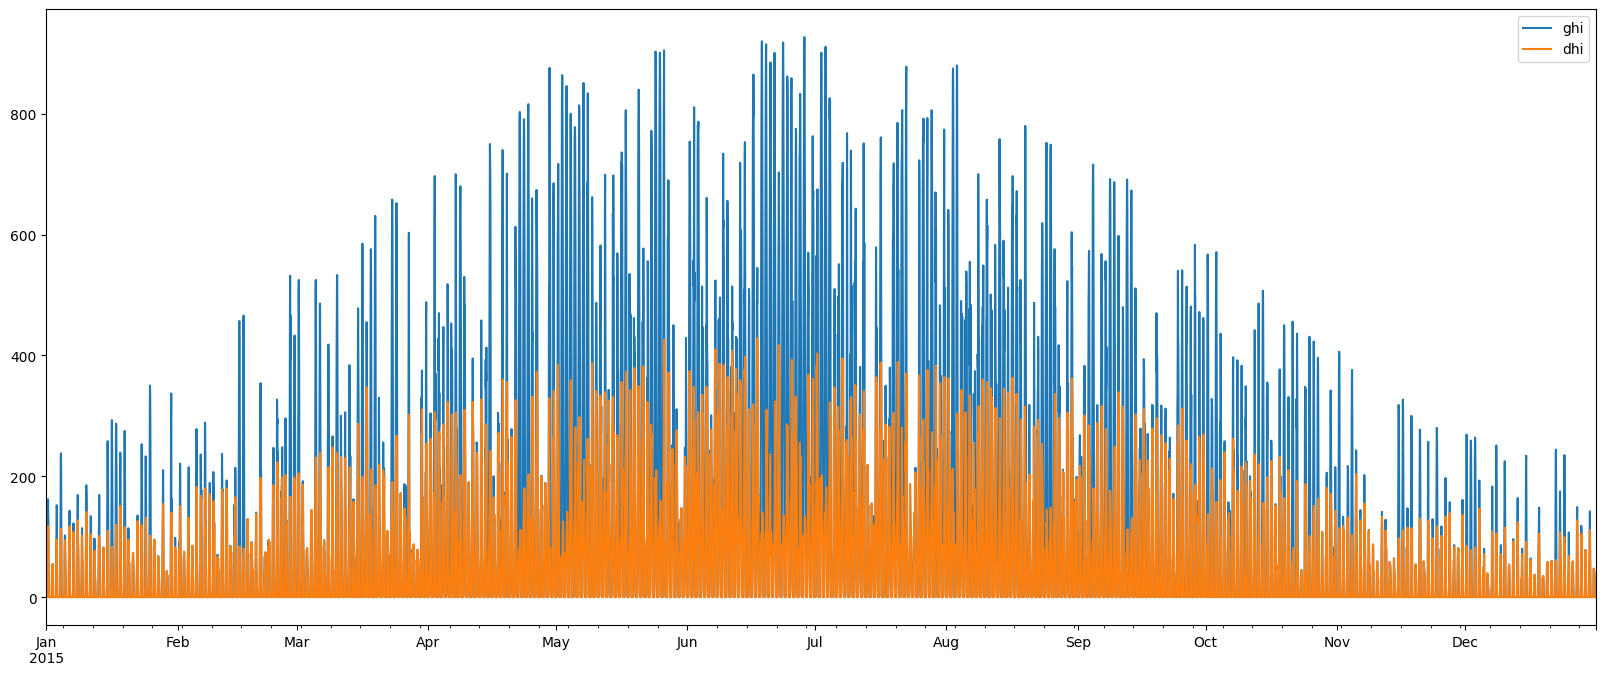

In [27]:
weather_pv_module.loc[:, ("ghi", "dhi")].plot(figsize=(20, 8))

## Lufttemperatur in °C

<Axes: >

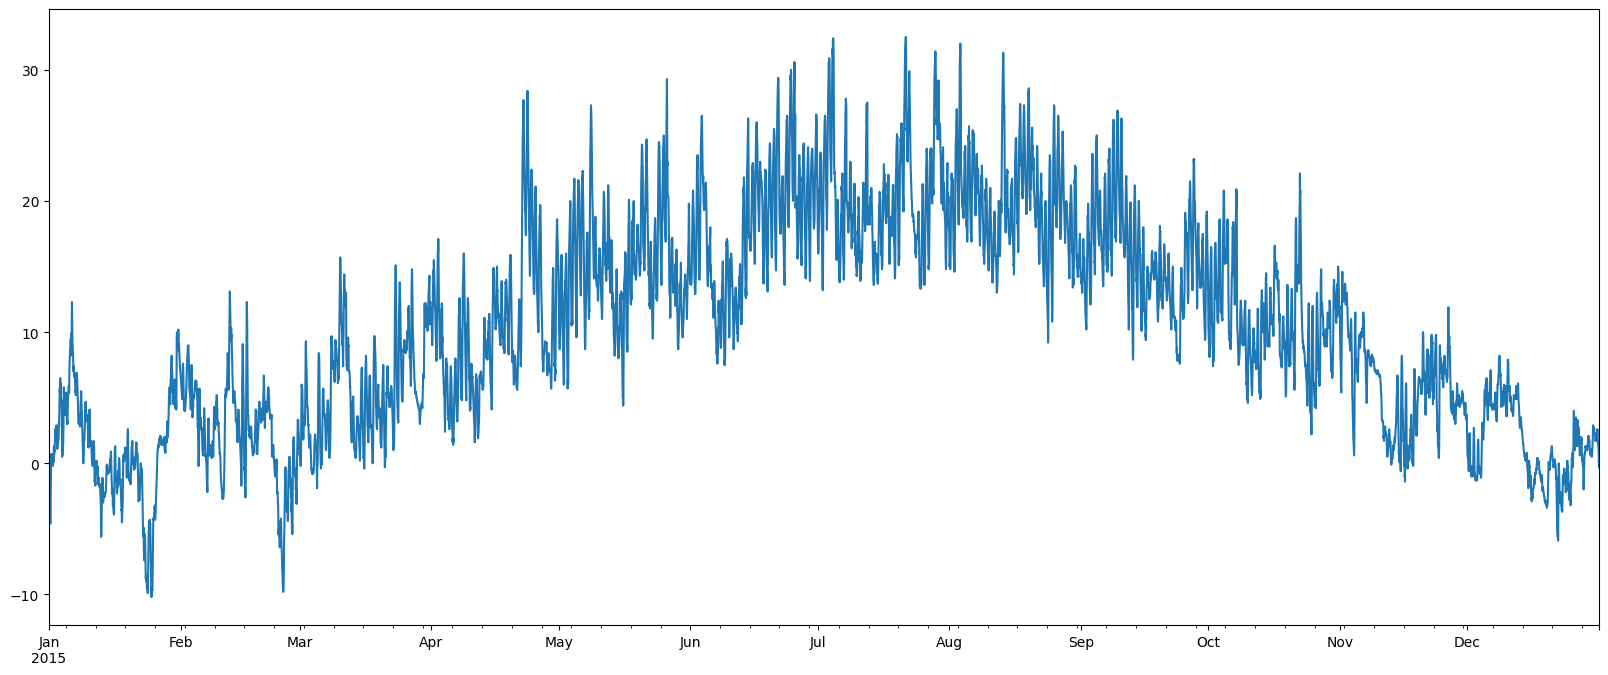

In [28]:
weather_pv_module.loc[:, ("temp_air")].plot(figsize=(20, 8), legend=False)

## Windgeschwindigkeit in m/s

<Axes: >

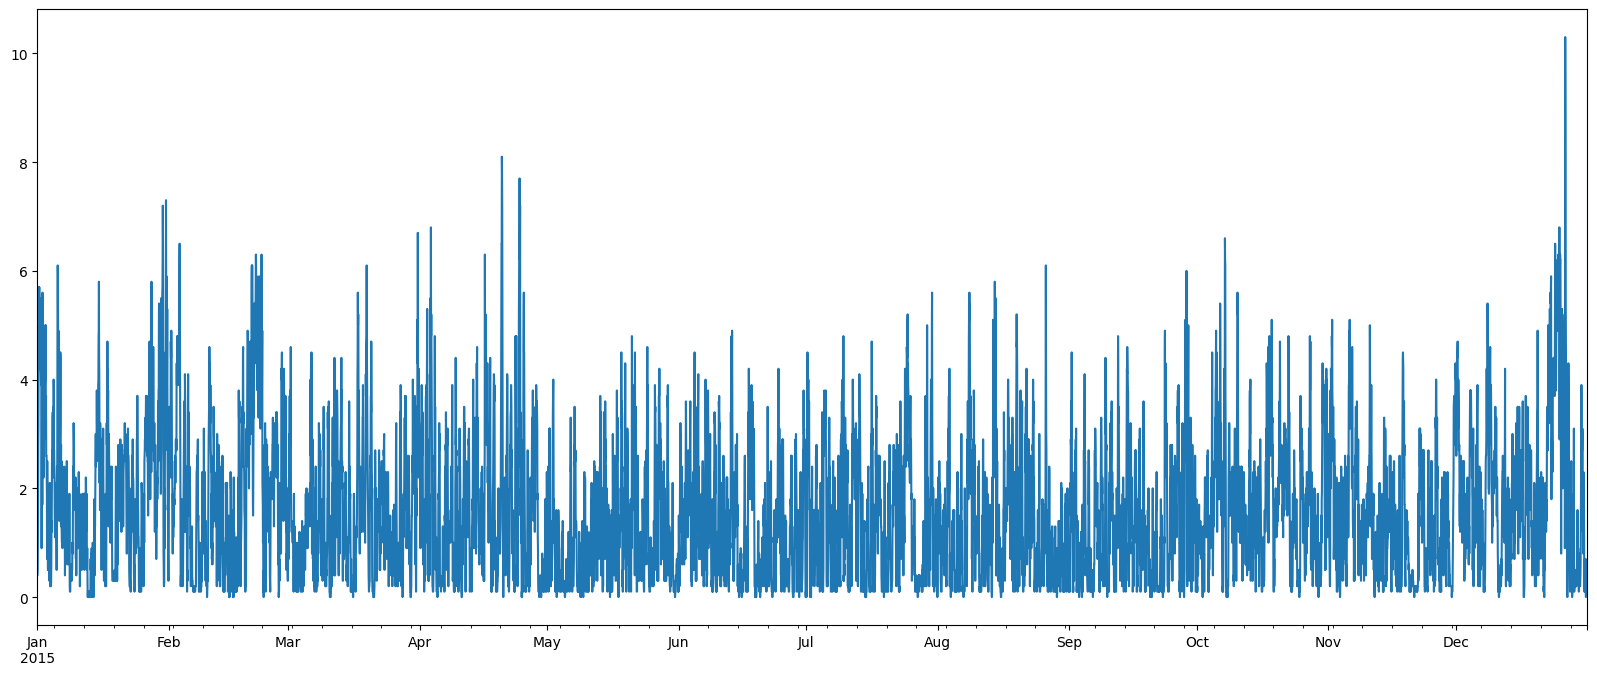

In [29]:
weather_wind_turbine.loc[:, ("wind_speed", 10)].plot(figsize=(20, 8), legend=False)

## Lufttemperatur in K

<Axes: >

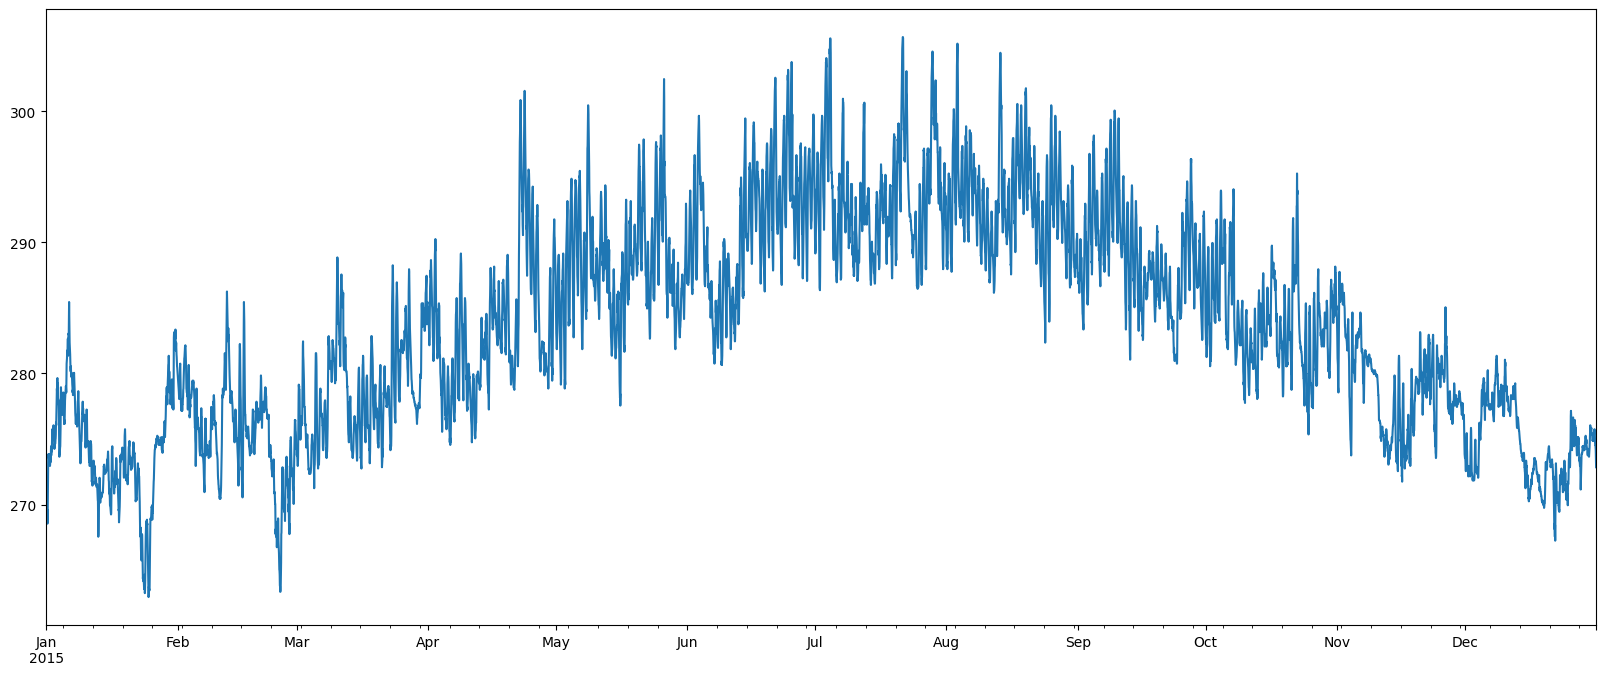

In [30]:
weather_wind_turbine.loc[:, ("temperature", 2)].plot(figsize=(20, 8), legend=False)

## Luftdruck in Pa

<Axes: >

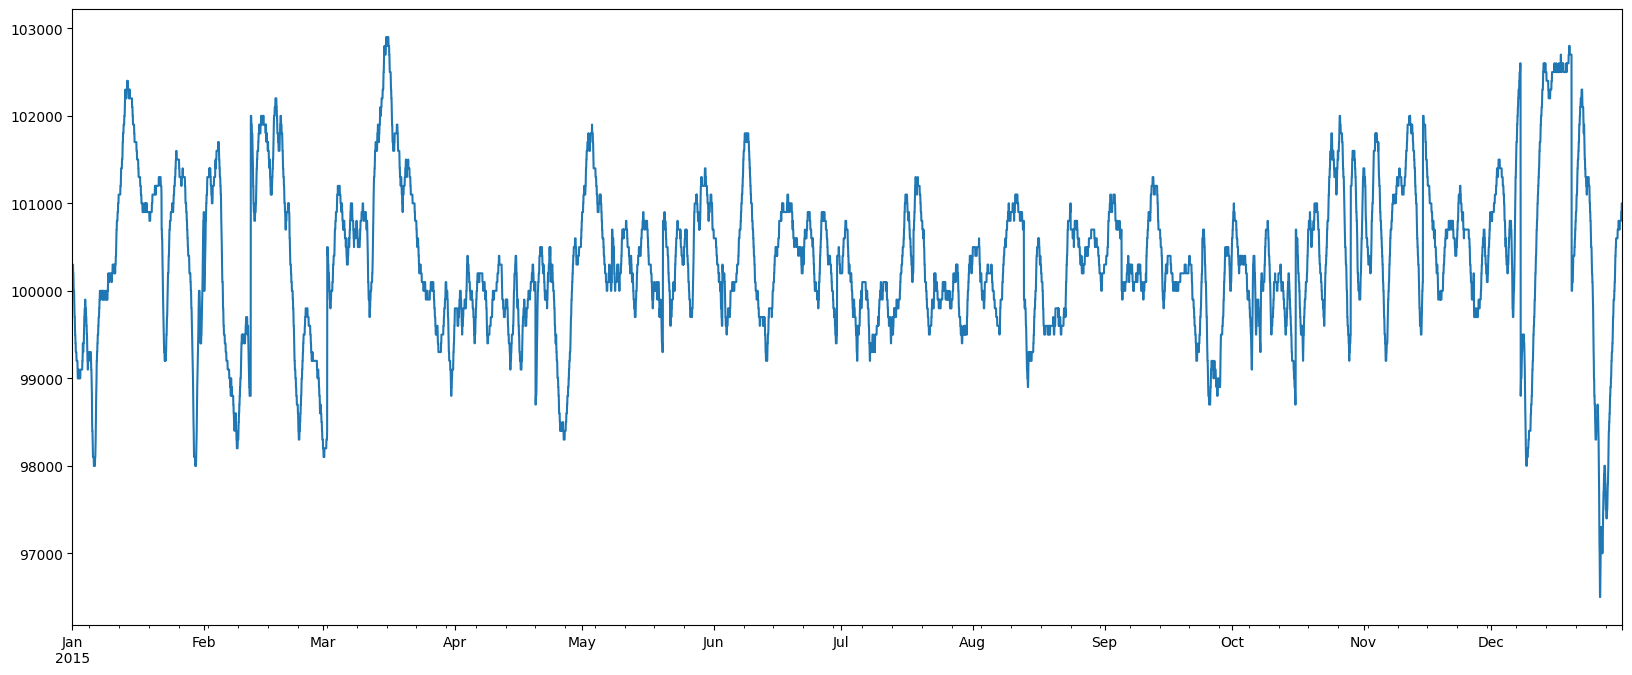

In [31]:
weather_wind_turbine.loc[:, ("pressure", 0)].plot(figsize=(20, 8), legend=False)

## Rauhigkeitslänge in m

<Axes: >

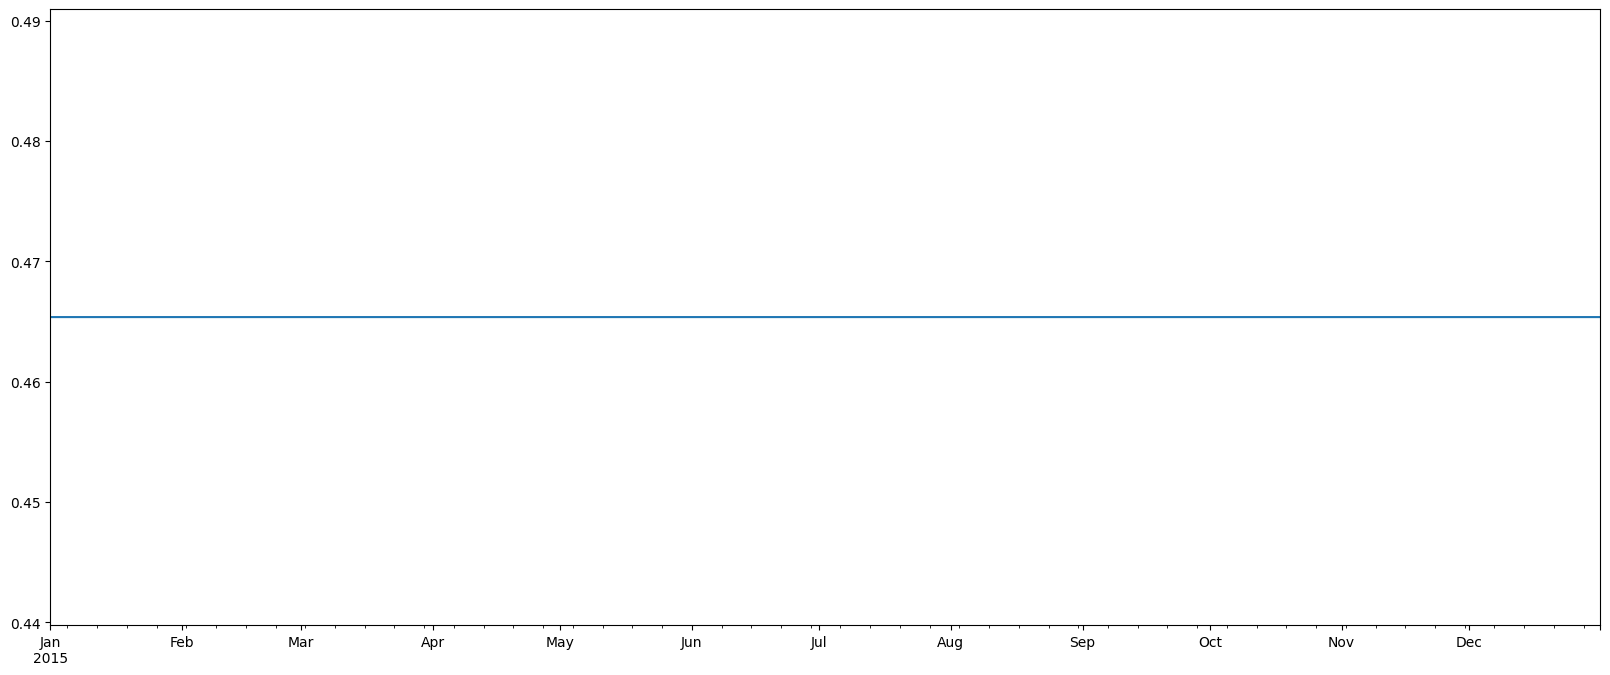

In [32]:
weather_wind_turbine.loc[:, ("roughness_length", 0)].plot(figsize=(20, 8), legend=False)

# 4. PV

<Axes: >

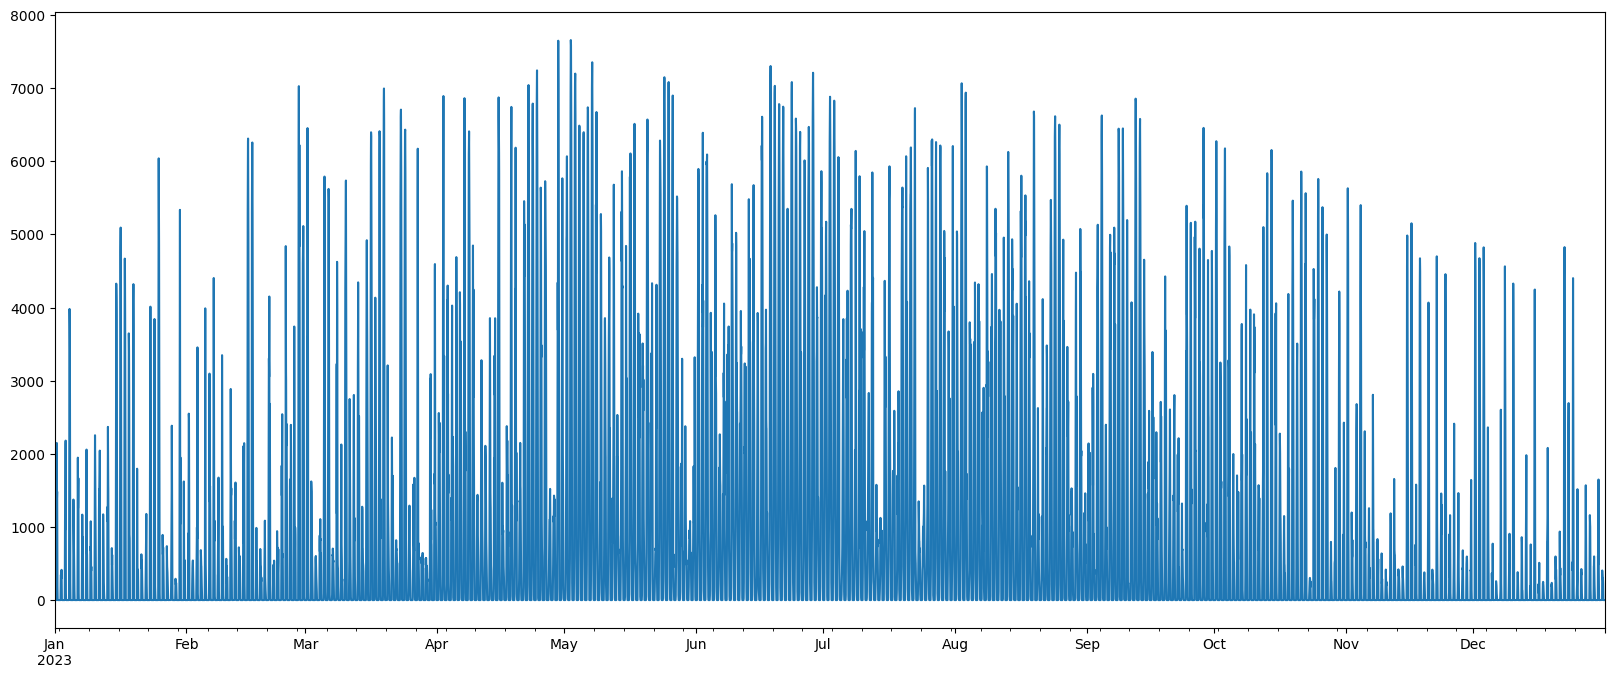

In [33]:
from pstm.pv import PV

pv = PV(
    dates=dates,
    power_inst=10_000,
    efficiency_inv=0.9,
    lat=lat,
    lon=lon,
    alt=alt,
)

pv.run(weather=weather_pv_module)

(-pv.acp.loc[:, "low"]).plot(figsize=(20, 8), legend=False)

# 5. Wind

## 5.1 DWD

<Axes: >

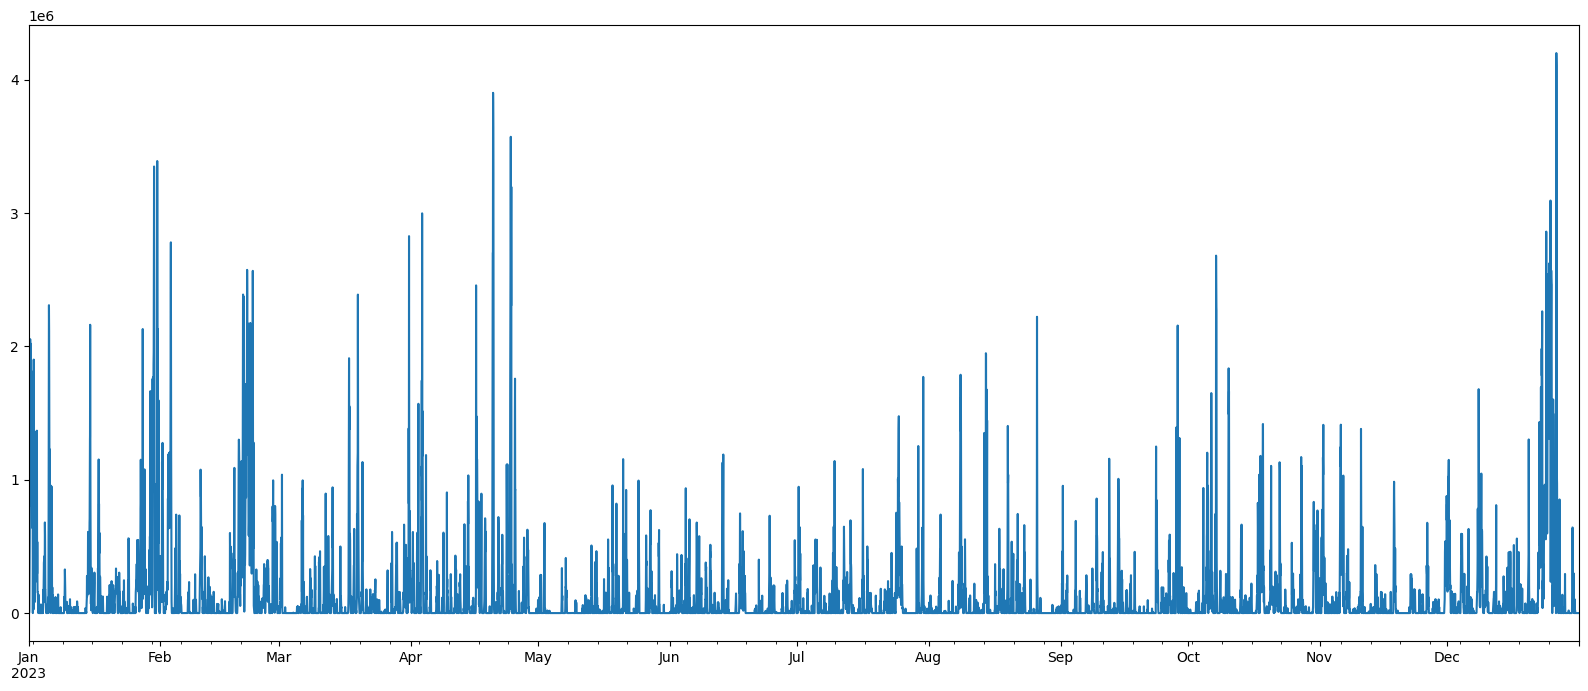

In [34]:
from pstm.wind import Wind

w = Wind(
    dates=dates,
    power_inst=4_200_000,
    hub_height=135,
    turbine_type="E-126/4200",
)

w.run(weather=weather_wind_turbine)

(-w.acp.loc[:, "low"]).plot(figsize=(20, 8), legend=False)

## 5.2 NEWA

<Axes: >

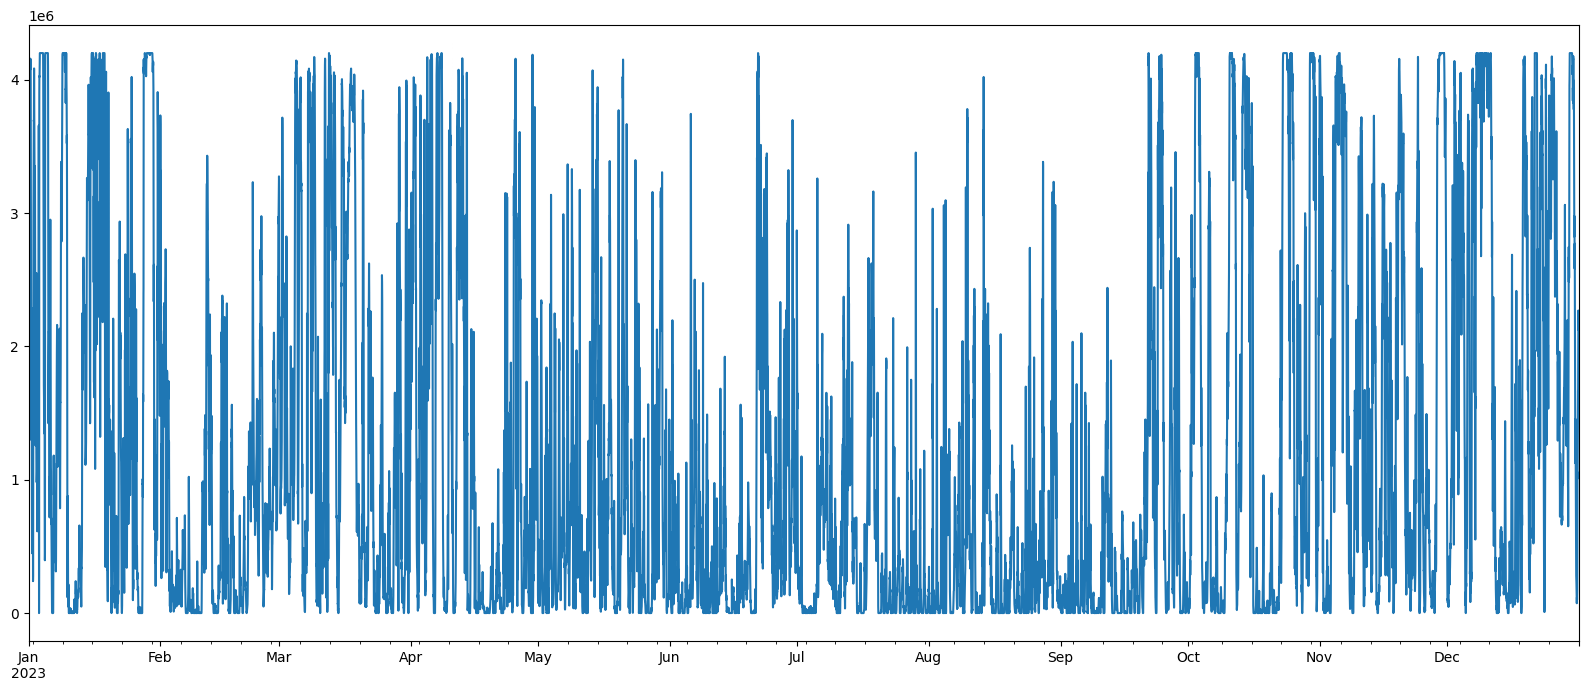

In [35]:
from pstm.utils.weather import NEWA

newa = NEWA.from_api(lat=lat, lon=lon, year=2018, tz=tz)

w.run(weather=newa.weather)

(-w.acp.loc[:, "low"]).plot(figsize=(20, 8), legend=False)

# 6. Dickertsche Haushaltslasten

2025-02-21 13:26:10.743 | INFO     | pstm.utils.geo:_init_zip_codes_file:183 - Loading zip codes file...
2025-02-21 13:26:11.096 | INFO     | pstm.utils.geo:_init_zip_codes_file:185 - Loading zip codes file. Done.
2025-02-21 13:26:11.097 | INFO     | pstm.utils.geo:_init_altitude_file:188 - Loading altitude file...
2025-02-21 13:26:11.104 | INFO     | pstm.utils.geo:_init_altitude_file:191 - Loading altitude file. Done.
2025-02-21 13:26:11.105 | INFO     | pstm.utils.geo:_init_dwd_try_zones_file:194 - Loading DWD TRY zones file...
2025-02-21 13:26:11.115 | INFO     | pstm.utils.geo:_init_dwd_try_zones_file:196 - Loading DWD TRY zones file. Done.
2025-02-21 13:26:11.115 | INFO     | pstm.utils.geo:_init_weather_gen_index_file:212 - Loading DWD TRY index file...
2025-02-21 13:26:11.116 | WARNING  | pstm.utils.geo:_init_weather_gen_index_file:222 - Could not find DWD TRY index file. Some methods may not work properly.
2025-02-21 13:26:11.116 | INFO     | pstm.utils.geo:_init_weather_gen_i

PLZ: 01099
Altitude: 119 m
Timezone: Europe/Berlin


2025-02-21 13:26:12.273 | INFO     | pstm.utils.geo:_init_zip_codes_file:185 - Loading zip codes file. Done.
2025-02-21 13:26:12.274 | INFO     | pstm.utils.geo:_init_altitude_file:188 - Loading altitude file...
2025-02-21 13:26:12.281 | INFO     | pstm.utils.geo:_init_altitude_file:191 - Loading altitude file. Done.
2025-02-21 13:26:12.281 | INFO     | pstm.utils.geo:_init_dwd_try_zones_file:194 - Loading DWD TRY zones file...
2025-02-21 13:26:12.293 | INFO     | pstm.utils.geo:_init_dwd_try_zones_file:196 - Loading DWD TRY zones file. Done.
2025-02-21 13:26:12.293 | INFO     | pstm.utils.geo:_init_weather_gen_index_file:212 - Loading DWD TRY index file...
2025-02-21 13:26:12.293 | WARNING  | pstm.utils.geo:_init_weather_gen_index_file:222 - Could not find DWD TRY index file. Some methods may not work properly.
2025-02-21 13:26:12.293 | INFO     | pstm.utils.geo:_init_weather_gen_index_file:224 - Loading DWD TRY index file. Done.
2025-02-21 13:26:12.294 | INFO     | pstm.utils.geo:_in

<Axes: >

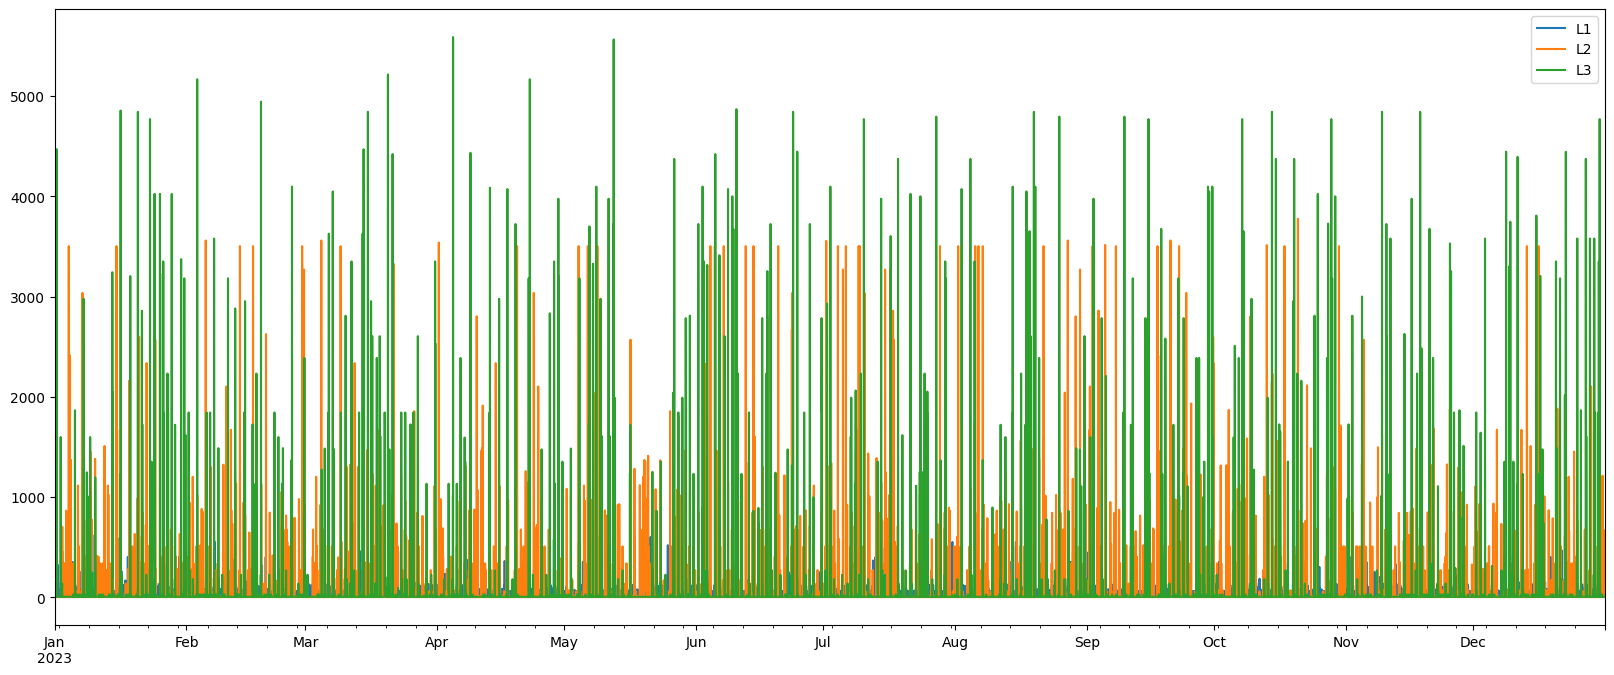

In [3]:
import datetime as dt
import pathlib

import numpy as np

from pstm.utils.dates import date_range
from pstm.utils.geo import GeoRef

dates = date_range(year=2023, tz=tz, freq=dt.timedelta(minutes=15))
from pstm.dickert.households import Households

lat, lon = 51.071265, 13.755601

with GeoRef(use_clc=False) as georef:
    plz = georef.get_zip_code(lat=lat, lon=lon)
    alt = georef.get_altitude(lat=lat, lon=lon)
    tz = georef.get_time_zone(lat=lat, lon=lon)
    print(f"PLZ: {plz}")
    print(f"Altitude: {alt:.0f} m")
    print(f"Timezone: {tz}")

generator = np.random.default_rng(seed=90697676838983)

hhs = Households.from_json(pathlib.Path("../data/household/dickert/hh1.json"))
hhs.run(n_units=2, lat=lat, lon=lon, altitude=alt, year=2022, generator=generator)
hhd = hhs.get(index_target=dates)
hhd.acp.loc[:, "high"].plot(figsize=(20, 8))

# 7. VDI4655 Lastprofile

## elektrisch

<Axes: >

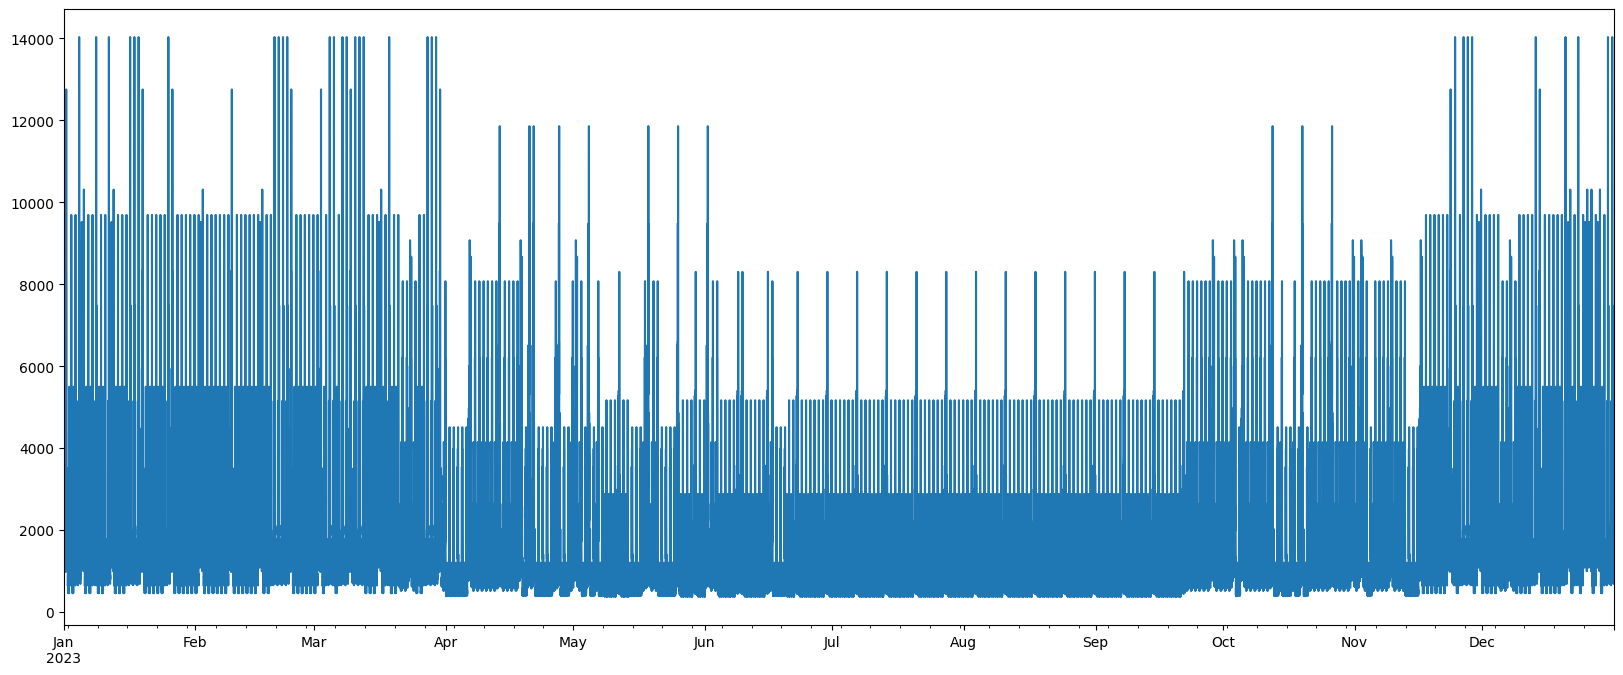

In [16]:
from pstm.household_vdi4655 import Household

climate_zone = georef.get_dwd_try_zone(lat, lon)
hh = Household(
    house_type="OFH",
    building_type="LEH",
    n_units=8,
    area=120,
    heat_demand=70,
    lat=lat,
    lon=lon,
    tz=tz,
    climate_zone=climate_zone,
    dates=dates,
)
hh.run()
hh.acp.loc[:, "high"].plot(figsize=(20, 8), legend=False)

<Axes: >

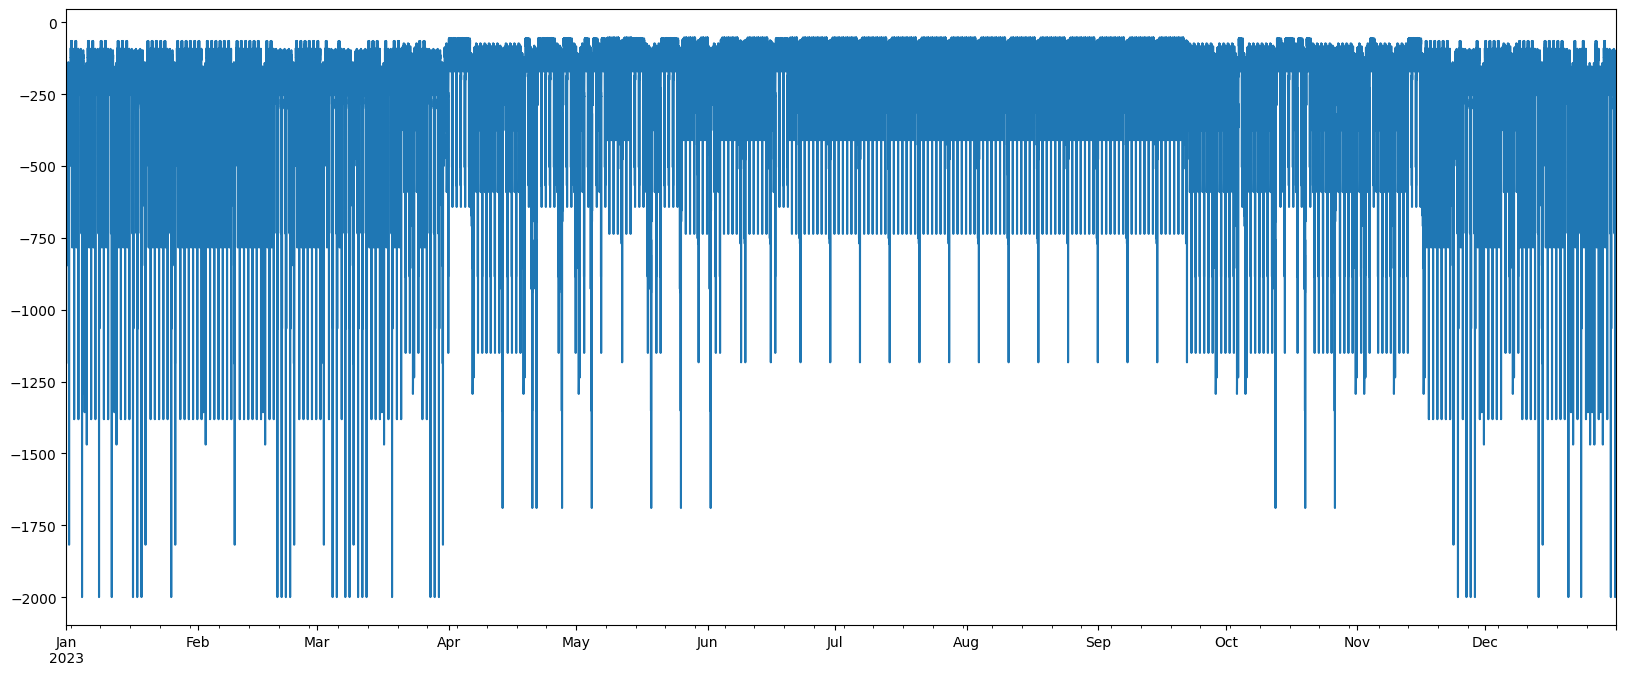

In [17]:
hh.acq.loc[:, "high"].plot(figsize=(20, 8), legend=False)

## thermisch

<Axes: >

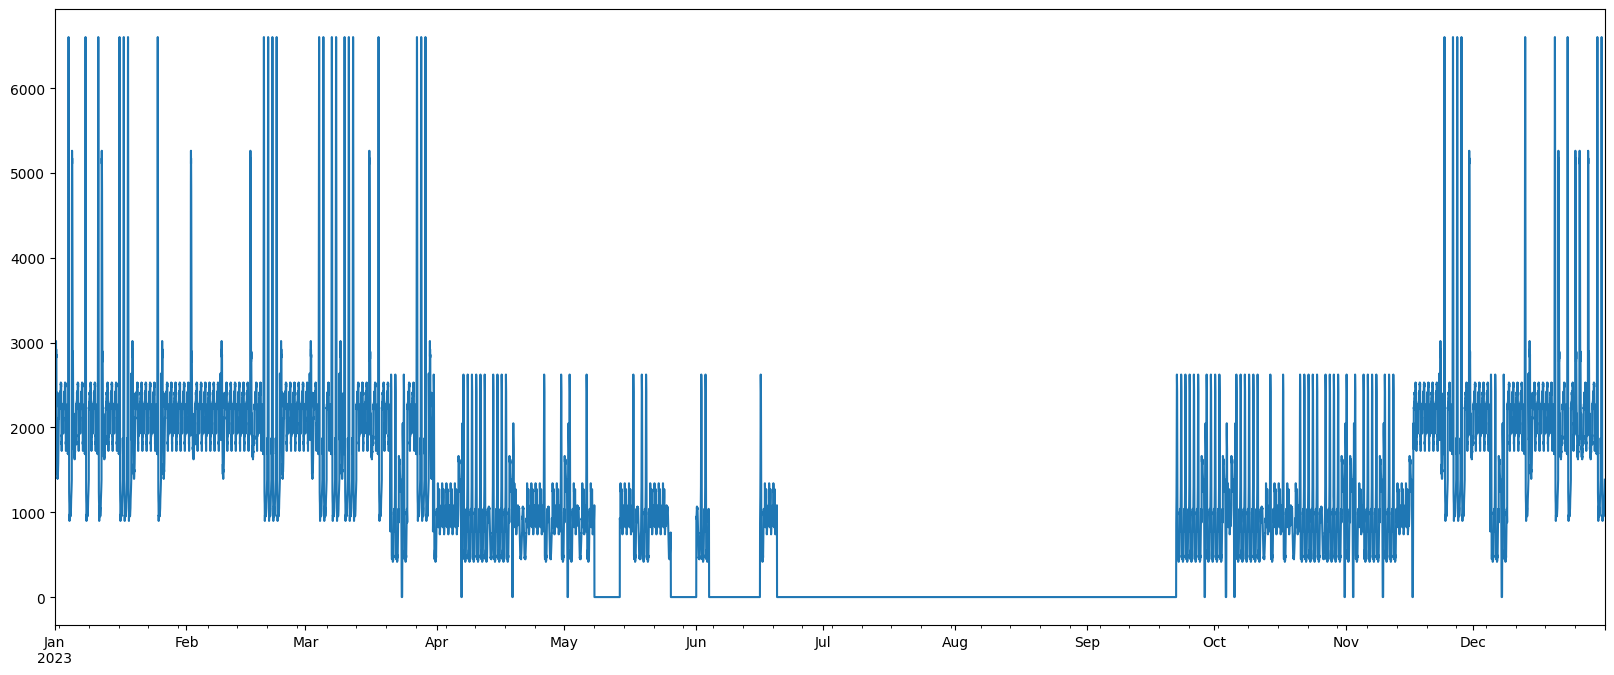

In [18]:
hh.thr.loc[:, "high"].plot(figsize=(20, 8))

<Axes: >

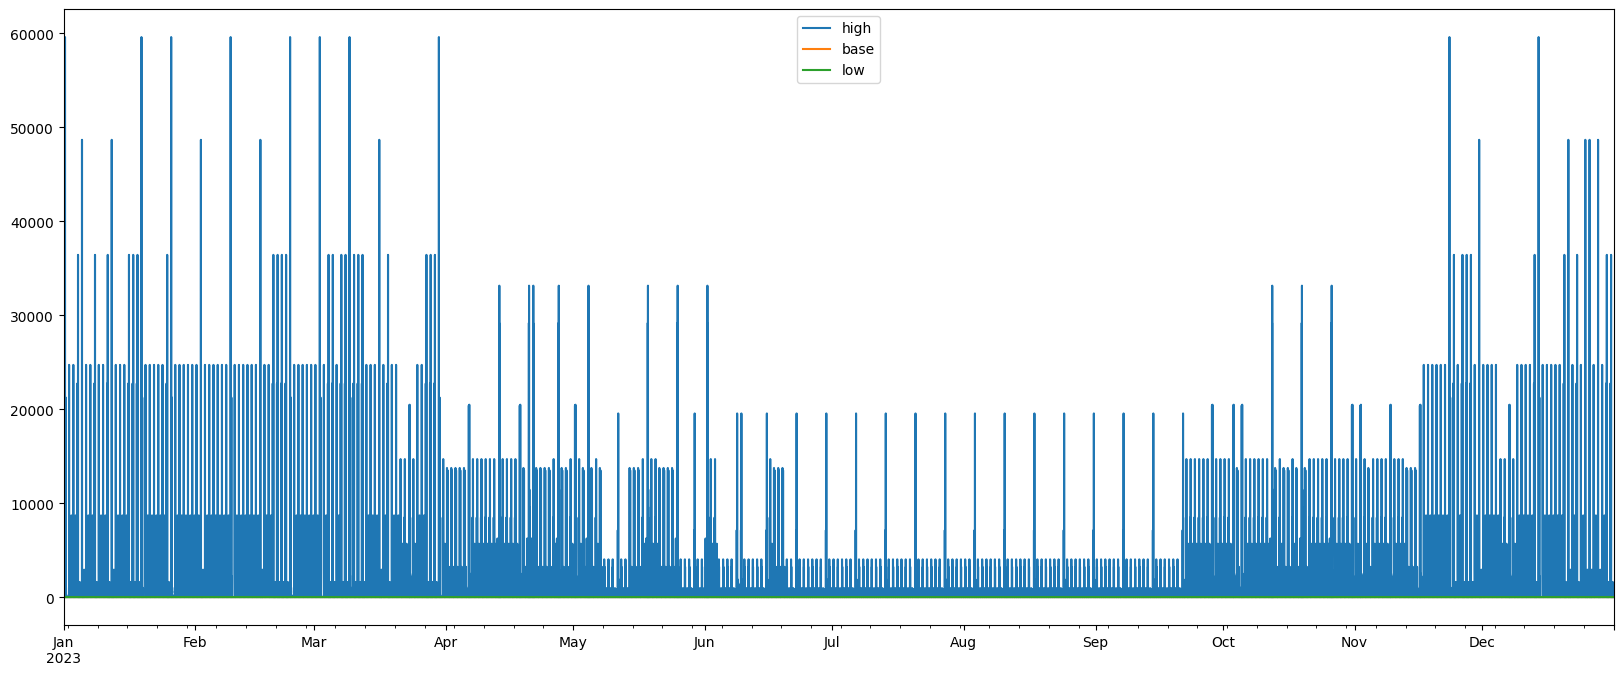

In [19]:
hh.thw.plot(figsize=(20, 8))

# 8. Wärmepumpe

## elektrisch

In [13]:
from pstm.heat_pump import AirHeatPump

hp = AirHeatPump(
    dates=dates,
    power_inst=18.2,
    target_temp=35,
    cosphi=0.8,
    efficiency="high",
    tz=tz,
)

hp.run(temp=weather_pv_module.temp_air)

<Axes: >

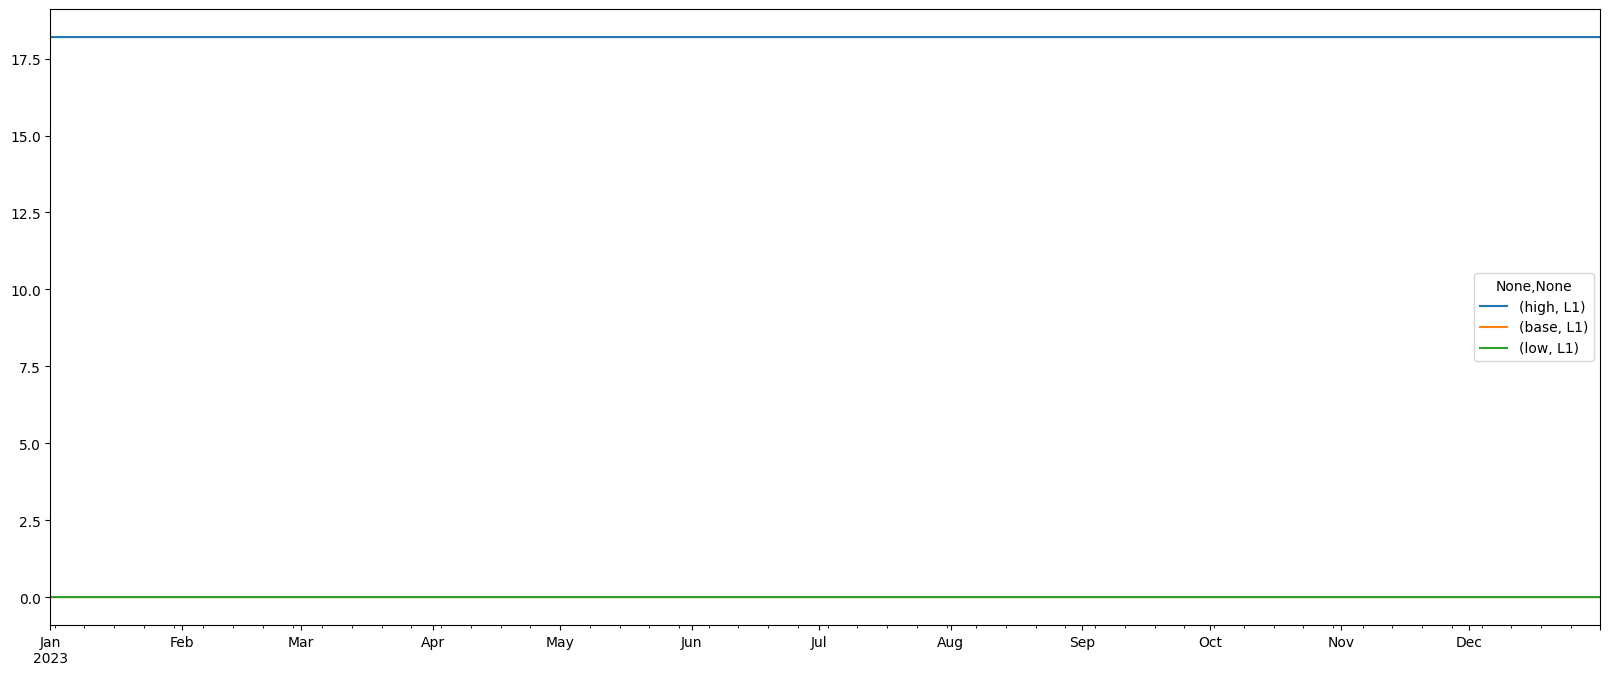

In [14]:
hp.acp.plot(figsize=(20, 8))

## thermisch

<Axes: >

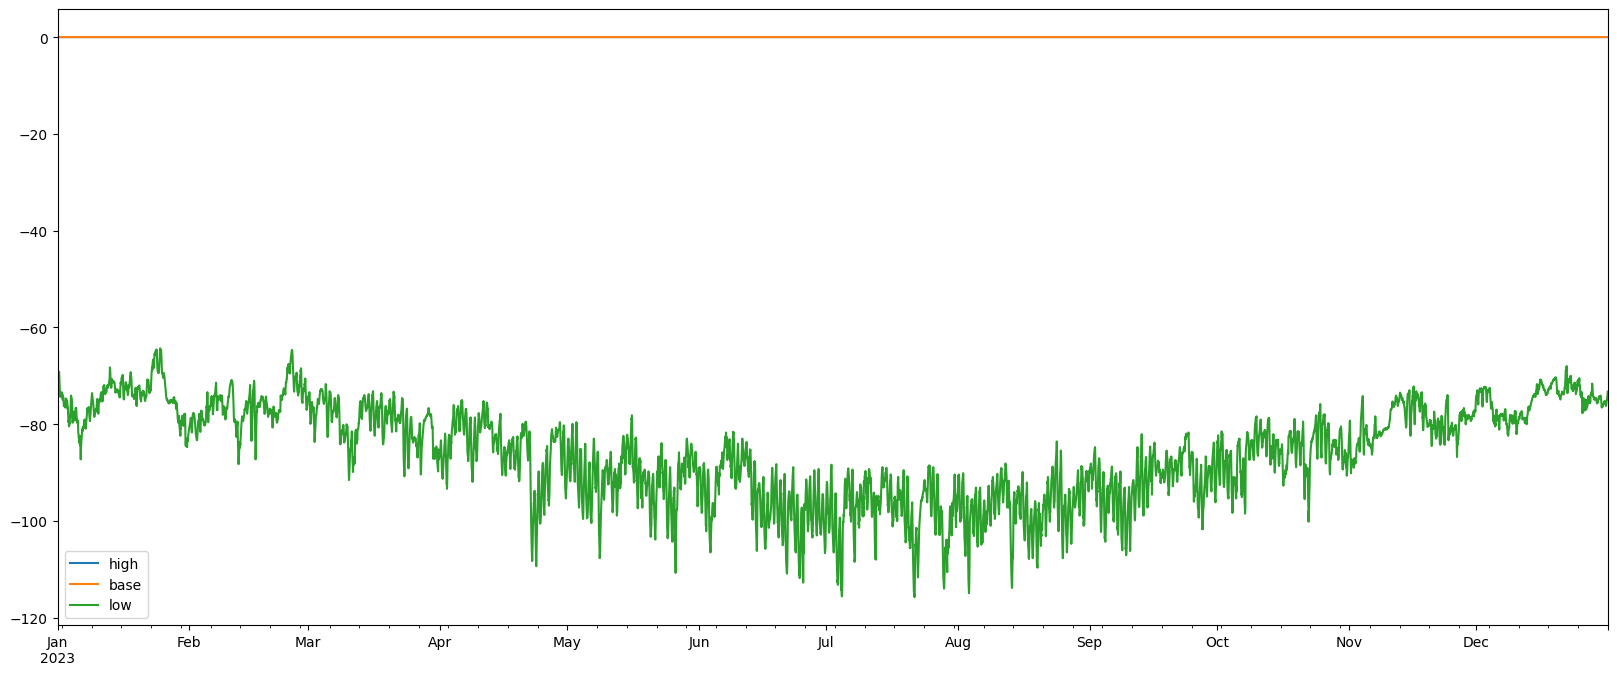

In [15]:
hp.thr.plot(figsize=(20, 8))

<Axes: >

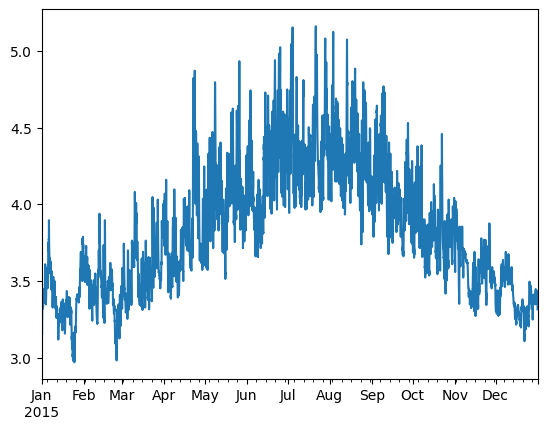

In [53]:
hp.calc_cop(50 - weather_pv_module.temp_air).plot()

In [54]:
weather_pv_module.temp_air

2015-01-01 00:00:00+01:00   -1.3
2015-01-01 01:00:00+01:00   -2.2
2015-01-01 02:00:00+01:00   -3.0
2015-01-01 03:00:00+01:00   -3.5
2015-01-01 04:00:00+01:00   -3.8
                            ... 
2015-12-31 19:00:00+01:00    1.4
2015-12-31 20:00:00+01:00    1.2
2015-12-31 21:00:00+01:00    1.0
2015-12-31 22:00:00+01:00    0.5
2015-12-31 23:00:00+01:00   -0.3
Freq: h, Name: temp_air, Length: 8760, dtype: float64

# 9. Elektrofahrzeuge

<Axes: >

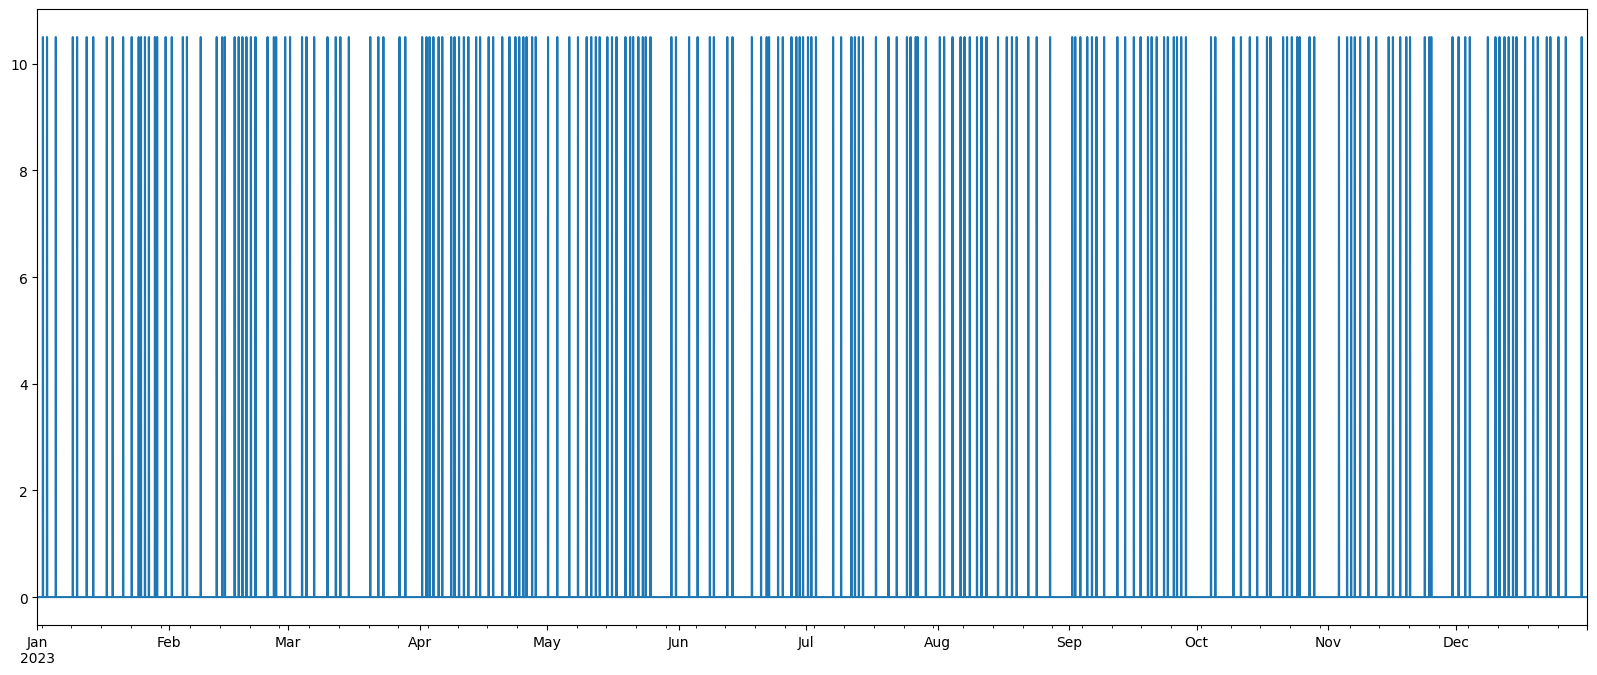

In [55]:
from pstm.ev import CARS
from pstm.ev import ChargePoint
from pstm.ev import Driver
from pstm.ev import EVSystem

charge_point = ChargePoint(charging_power_max=11)
car = CARS["BMW i3"]
driver = Driver.from_profile(profile=12)
ev_system = EVSystem(dates=dates, driver=driver, car=car, charge_point=charge_point, tz=tz)
ev_system.run()
ev_system.acp.loc[:, "high"].plot(figsize=(20, 8), legend=False)